# Example Jupyter-Notebook for mrbles analysis package

#### *Author: Björn Harink*  
*Last update: 20180710*  
*Set: PyPI shipped example data*  
*Description:* Short pipeline example for mrbles analysis package using shipped sample data.

Load mrbles package. This should depict:

`Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  x.x.x`

In [1]:
import mrbles

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.11.5


Additional required imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# For fancy interactive Plotly graphs
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Download example files from: https://github.com/FordyceLab/MRBLEs/tree/master/data

Set package_path where you unpacked all the files.

In [3]:
package_path = '../data/'

## Load MRBLE library information

Load excel file with information about the the MRBLES library. Please use example file.

Main information that needs to in there are the different ratios (e.g. Dy, Sm, Tm). The code number starts from 0 and is based on the row number. Additional code numbers can be given (for instance when using a partial code set), but this not influence the code calling. All additional columns  provided in the classes are added as information, with a `info.` as prefix.

In [4]:
mrbles_library_info = pd.read_excel(package_path + 'mrbles-library-info-example.xlsx')

In [5]:
mrbles_library_info

code          sequence  repeat      set           info       Dy       Sm  \
0      1   AGIVPIHVTHAPGEE     NaN    match       Scramble  0.00000  0.00000   
1      2      HPVIVITGPHEE     NaN    match      PVIVIT-WT  0.00000  0.00000   
2      3      HPRIVITGPHEE     NaN    match    PVIVIT-Core  0.00000  0.00000   
3      4      HPLIVITGPHEE     NaN    match    PVIVIT-Core  0.00000  0.00000   
4      5      HPVIVIEGPHEE     NaN    match    PVIVIT-Core  0.00000  0.10822   
5      6      HPVIVLTGPHEE     NaN    match    PVIVIT-Core  0.00000  0.10822   
6      7      IPVIVITGPHEE     NaN    match   PVIVIT-Flank  0.00000  0.10822   
7      8      HPVIVITGLHEE     NaN    match   PVIVIT-Flank  0.00000  0.10822   
8      9      HPVIVITMPHEE     NaN    match   PVIVIT-Flank  0.00000  0.25050   
9     10      HPKIVITGPHEE     NaN    match    PKIVIT-Core  0.00000  0.25050   
10    11      HPKIIITGPHEE     NaN    match    PKIVIT-Core  0.00000  0.25050   
11    12      HPKIVLTGPHEE     NaN    match    PKIVIT-Core  0.00000  0.43758   
12    13      HPKIVIQGPHEE     NaN    match    PKIVIT-Core  0.00000  0.43758   
13    14      IPKIVITGPHEE     NaN    match   PKIVIT-Flank  0.00000  0.43758   
14    15      TPKIVITGPHEE     NaN    match   PKIVIT-Flank  0.00000  0.68356   
15    16      HPKIVITTPHEE     NaN    match   PKIVIT-Flank  0.00000  0.68356   
16    17      HPKIVITNPHEE     NaN    match   PKIVIT-Flank  0.00000  0.68356   
17    18      IPKIIITYPGEE     NaN  jackpot            NaN  0.08155  0.00000   
18    19      VPKIIITYPGEE     NaN  jackpot            NaN  0.08155  0.00000   
19    20      IPKIIVTYPGEE     NaN  jackpot            NaN  0.08155  0.00000   
20    21      IPKIIVTYPDEE     NaN  jackpot            NaN  0.08155  0.10822   
21    22      HPVIVITGPZEE     NaN    match   PVIVIT-Flank  0.08155  0.10822   
22    23      IPRIIITKPZEE     NaN  jackpot            NaN  0.08155  0.10822   
23    24      IPKIIVTAPZEE     NaN  jackpot            NaN  0.08155  0.25050   
24    25      VPRIIITKPZEE     NaN  jackpot            NaN  0.08155  0.25050   
25    26      VPRIVITAPZEE     NaN  jackpot            NaN  0.08155  0.25050   
26    27      IPKIIITYPZEE     NaN  jackpot            NaN  0.08155  0.43758   
27    28  KRMEPIAIIITDTEIS     NaN    match      AKAP79-WT  0.08155  0.43758   
28    29  KRMEPIPIIITDTEIS     NaN    match    AKAP79-Core  0.08155  0.68356   
29    30  KRMEPPAIIITDTEIS     NaN    match    AKAP79-Core  0.08155  0.68356   
30    31  KRMEPIAIYITDTEIS     NaN    match    AKAP79-Core  0.20061  0.00000   
31    32  KRMEPIAIIITRTEIS     NaN    match   AKAP79-Flank  0.20061  0.00000   
32    33  KRMEPIAIIITKTEIS     NaN    match   AKAP79-Flank  0.20061  0.10822   
33    34  KRMEPIAIIITDTTIS     NaN    match   AKAP79-Flank  0.20061  0.10822   
34    35  KRMEPIAIIITDYEIS     NaN    match   AKAP79-Flank  0.20061  0.25050   
35    36  KRMEPPKIIITDTEIS     NaN  jackpot            NaN  0.20061  0.25050   
36    37  KRMEPPKIIITDTSIS     NaN  jackpot            NaN  0.20061  0.43758   
37    38  ASGLLPRIIITPPYEL     NaN  jackpot            NaN  0.20061  0.43758   
38    39  ASGLSPRIEITPSHEL     NaN    match      NFATc2-WT  0.20061  0.68356   
39    40  ASGLSPRILITPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.00000   
40    41  ASGLSPRIAITPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.00000   
41    42  ASGLSPRIEISPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.10822   
42    43  ASGLSPRIEIFPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.25050   
43    44  ASGLLPRIEITPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.43758   
44    45  ASGLSPRIEITPFHEL     NaN    match  NFATc2-Mutant  0.62826  0.00000   
45    46  ASGLSPRIEITASHEL     NaN    match  NFATc2-Mutant  0.62826  0.10822   
46    47  ASGLSPRIEITPSSEL     NaN    match  NFATc2-Mutant  0.62826  0.25050   
47    48  ASGLLPRIEITPPPEL     NaN  jackpot            NaN  0.99882  0.00000   

         Tm  
0   0.00000  
1   0.08449  
2   0.28960  
3   0.78752  
4   0.00000  

## Load sample images using: 'mbrles.Images'

Load the folder paths and filenames.

In [6]:
image_folders = {'Set A': package_path,
                 'Set B': package_path
}

image_patterns = {"Set A" : "peptide_biotin_streptavidin_.*.tif",
                  "Set B" : r"peptide_biotin_streptavidin_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif"
}

flat_field_image = package_path + "\\20180328-FF-Cy5-E-81im-BIN2.tif"

mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

Found 10 files in Set A
Found 10 files in Set B


Load images in memory.

In [7]:
mrbles_images.load()

By calling the `mrbles_images` object you can see the dataframe.

In [8]:
mrbles_images

{'Set A': <xarray.DataArray (f: 10, c: 11, y: 1024, x: 1024)>
array([[[[118, ..., 164],
         ...,
         [125, ..., 123]],

        ...,

        [[ 95, ...,  96],
         ...,
         [125, ...,  95]]],


       ...,


       [[[130, ..., 132],
         ...,
         [135, ..., 942]],

        ...,

        [[ 98, ..., 104],
         ...,
         [ 93, ...,  90]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...
Dimensions without coordinates: f, y, x, 'Set B': <xarray.DataArray (f: 10, c: 11, y: 1024, x: 1024)>
array([[[[118, ..., 164],
         ...,
         [125, ..., 123]],

        ...,

        [[ 95, ...,  96],
         ...,
         [125, ...,  95]]],


       ...,


       [[[130, ..., 132],
         ...,
         [135, ..., 942]],

        ...,

        [[ 98, ..., 104],
         ...,
         [ 93, ...,  90]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' 'l-474' 'l-536

Rename channels, if desired.

In [9]:
mrbles_images.rename_channel('Cy5_5%', 'Cy5')

Check channel names by selecting one of the image sets and add `.c`

In [10]:
mrbles_images['Set A'].c

<xarray.DataArray 'c' (c: 11)>
array(['Cy5', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572',
       'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...

You can access an individual images like this:

Apply flat-field correction, if desired.

In [11]:
mrbles_images.flat_field(flat_field_image, 'Cy5')

In [12]:
mrbles_images['Set A', 3, 'Cy5']

<xarray.DataArray (y: 1024, x: 1024)>
array([[113., 145., 115., ..., 135., 135., 124.],
       [125., 134., 143., ..., 147., 180., 128.],
       [112., 124., 134., ..., 145., 182., 139.],
       ...,
       [123., 134., 117., ..., 153., 136., 148.],
       [125., 136., 136., ..., 167., 167., 135.],
       [128., 127., 117., ..., 165., 153., 138.]])
Coordinates:
    c        <U3 'Cy5'
Dimensions without coordinates: y, x

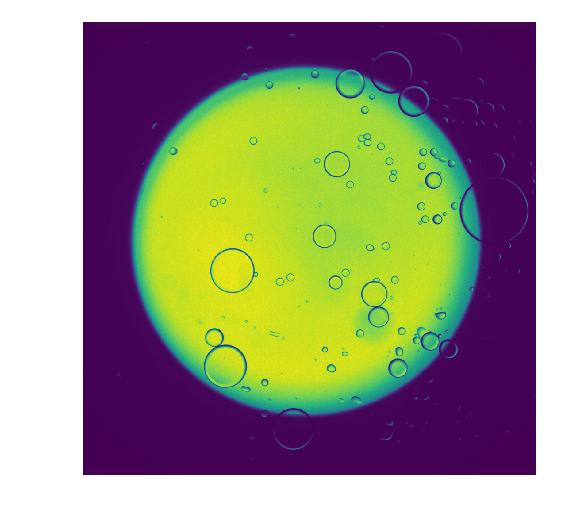

In [13]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Brightfield']);

Crop images to select an ROI, and/or to save memory in subsequent steps. ROI can changed multiple, since full images stay loaded inside object.

In [14]:
mrbles_images.crop_x = slice(80, 900)
mrbles_images.crop_y = slice(80, 900)

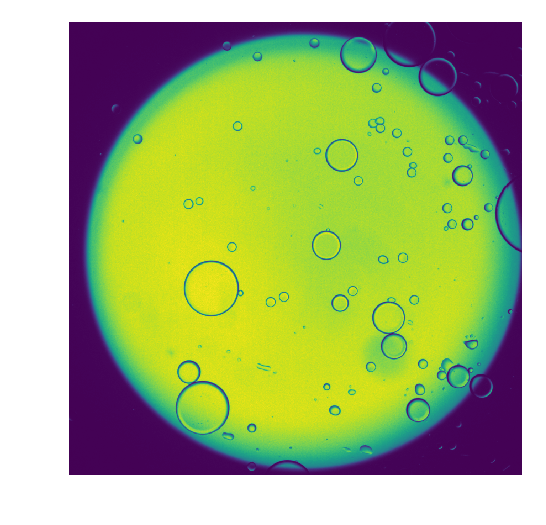

In [15]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Brightfield']);

Check flat-field correction before and after.

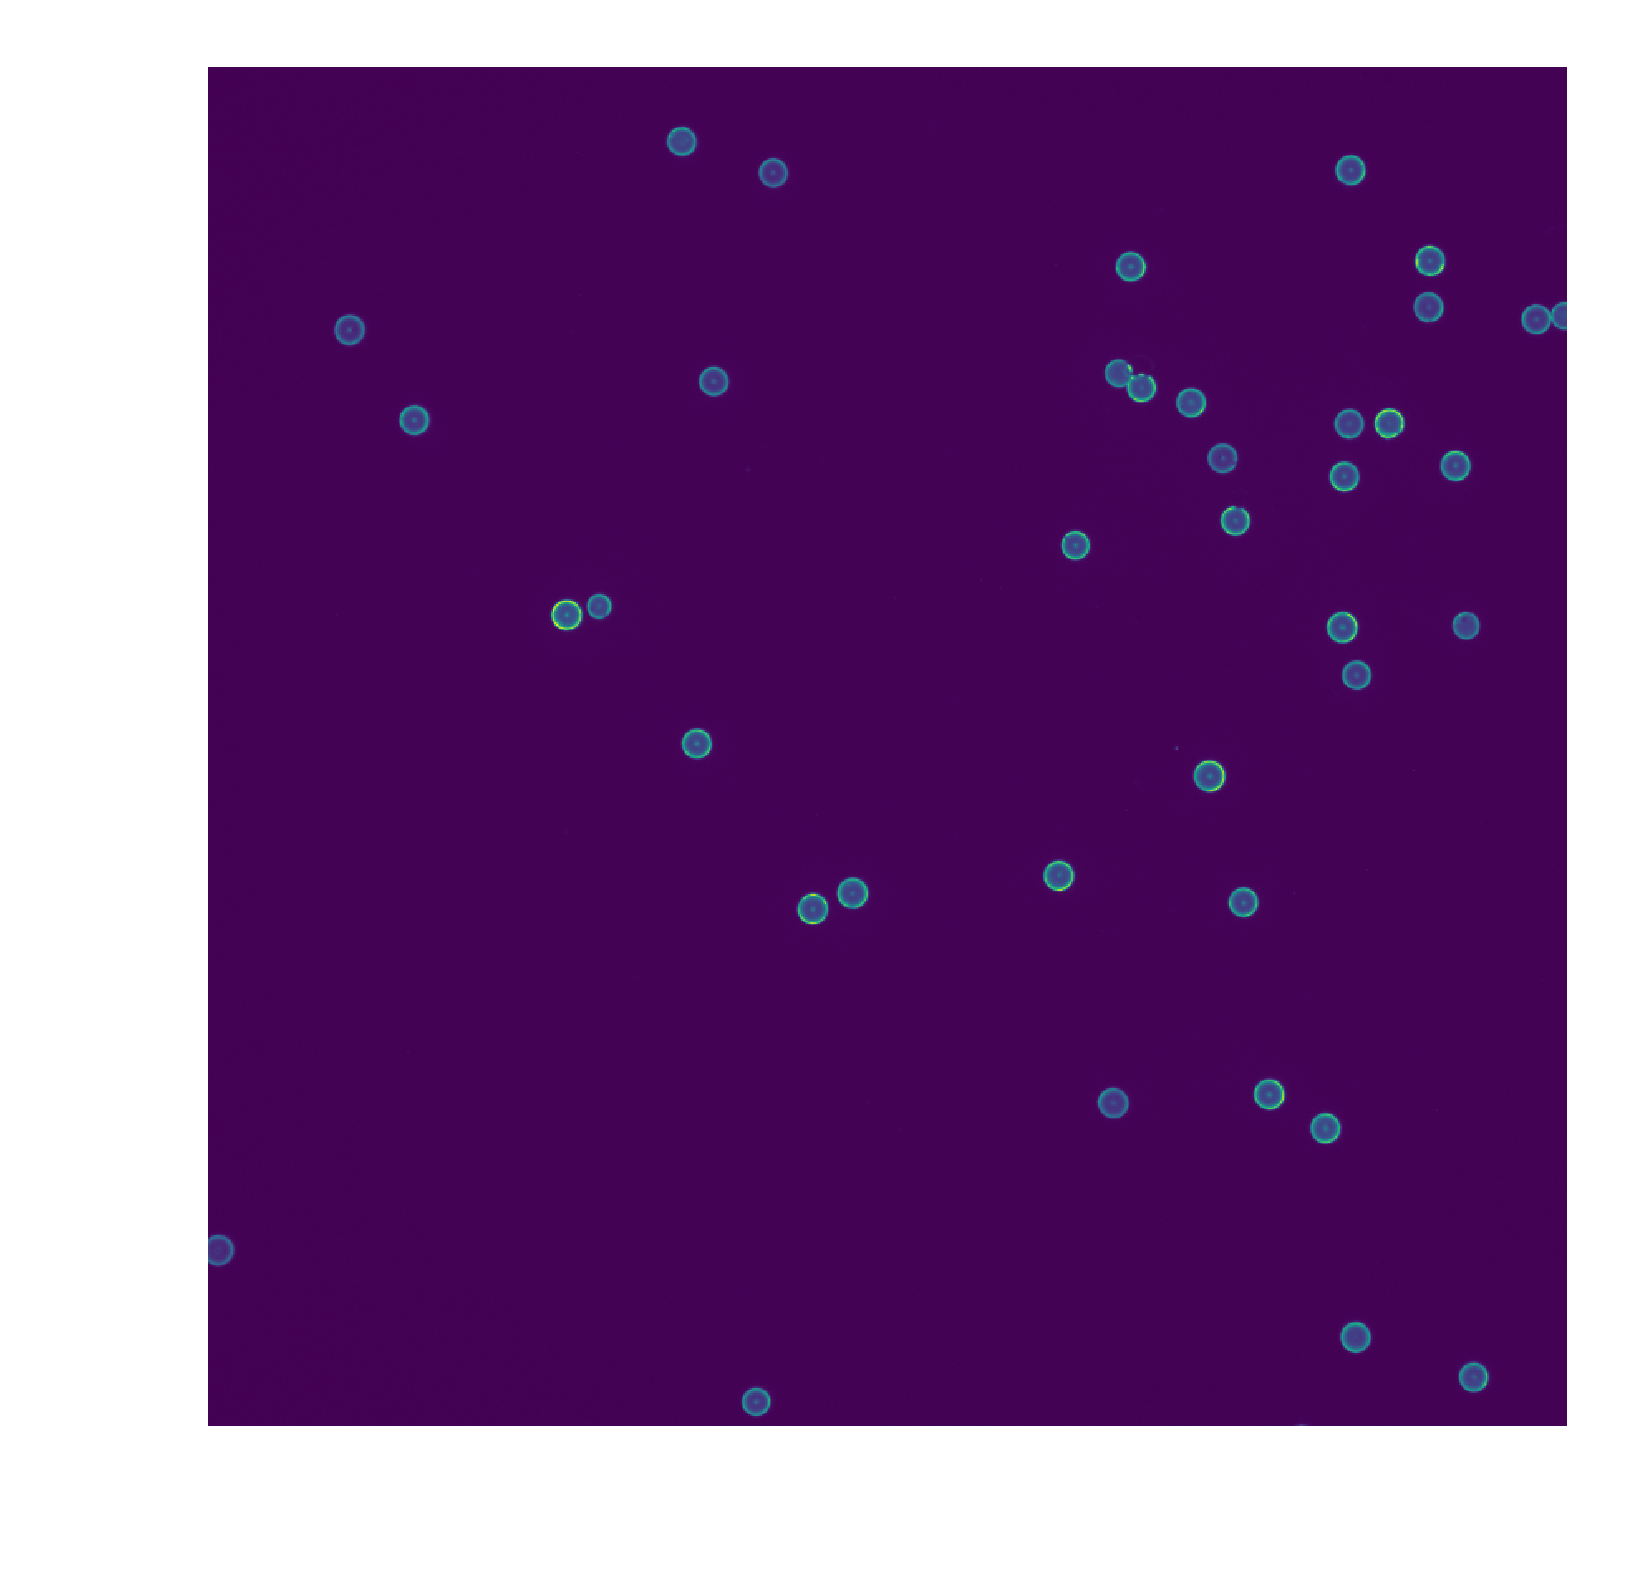

In [16]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Cy5']);

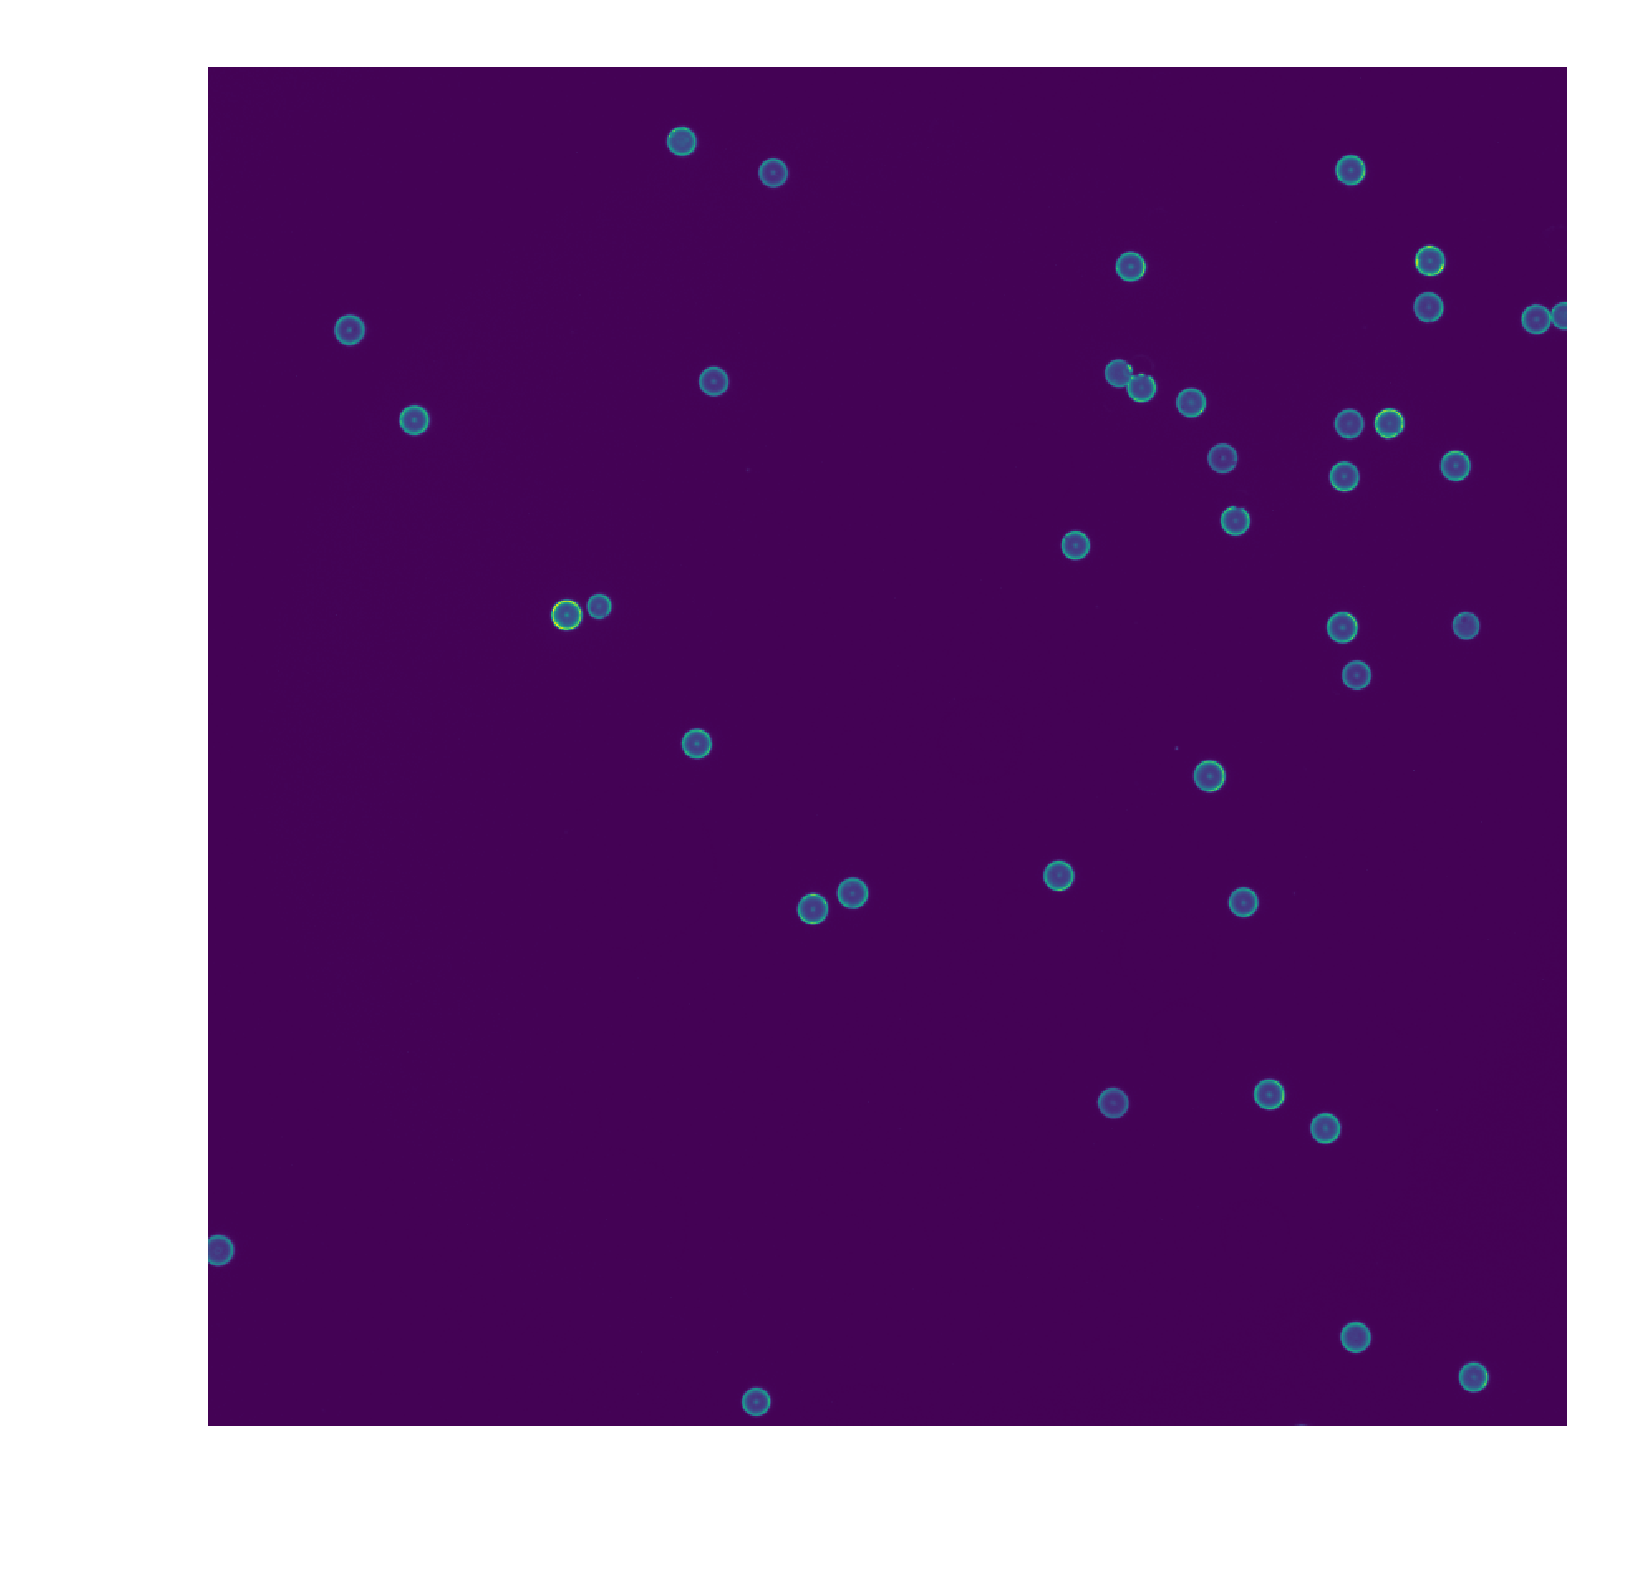

In [17]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Cy5_FF']);

### Alternative image loading method
The alternative method (if not using OME-Tiff micro-manager image stacks) to load images is using Pyhton dictionaries with numpy arrays. As a demonstrator we convert the previously loaded images as numpy arrays.

In [18]:
set_A_np = mrbles_images['Set A'].values
set_B_np = mrbles_images['Set B'].values

In [19]:
set_A_np

array([[[[ 165.        ,  167.        ,  189.        , ...,
           180.        ,  184.        ,  164.        ],
         [ 182.        ,  186.        ,  166.        , ...,
           225.        ,  213.        ,  198.        ],
         [ 173.        ,  185.        ,  172.        , ...,
           177.        ,  226.        ,  185.        ],
         ...,
         [ 182.        ,  177.        ,  178.        , ...,
           193.        ,  181.        ,  236.        ],
         [ 179.        ,  169.        ,  187.        , ...,
           211.        ,  184.        ,  184.        ],
         [ 185.        ,  214.        ,  151.        , ...,
           232.        ,  185.        ,  172.        ]],

        [[ 156.        ,  153.        ,  161.        , ...,
           204.        ,  211.        ,  205.        ],
         [ 151.        ,  163.        ,  147.        , ...,
           225.        ,  224.        ,  193.        ],
         [ 176.        ,  150.        ,  140.        , .

The order of the numpy array must be file (f), channel (c), Y-axis (y), X-axis (x): `[f, c, y, x]`.

In [20]:
set_A_np.shape

(10, 12, 820, 820)

Insert numpy arrays into Pyhton dictionary.

In [21]:
image_data = {"Set A" : set_A_np,
              "Set B" : set_B_np
}

Create a list of channel names (must be same size as channel dimension size)

In [22]:
channels = ['Cy5', 'Cy5_FF', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572', 'l-620', 'l-630', 'l-650', 'l-780']

Load images into mrbles.Images class.

In [23]:
mrbles_images_np = mrbles.Images(data=image_data, channels=channels)

In [24]:
mrbles_images_np

{'Set A': <xarray.DataArray (f: 10, c: 12, y: 820, x: 820)>
array([[[[165., ..., 164.],
         ...,
         [185., ..., 172.]],

        ...,

        [[109., ..., 115.],
         ...,
         [ 97., ...,  97.]]],


       ...,


       [[[157., ..., 174.],
         ...,
         [171., ..., 185.]],

        ...,

        [[ 99., ..., 100.],
         ...,
         [115., ..., 103.]]]])
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' 'l-435' 'l-474' 'l-536' ...
Dimensions without coordinates: f, y, x, 'Set B': <xarray.DataArray (f: 10, c: 12, y: 820, x: 820)>
array([[[[165., ..., 164.],
         ...,
         [185., ..., 172.]],

        ...,

        [[109., ..., 115.],
         ...,
         [ 97., ...,  97.]]],


       ...,


       [[[157., ..., 174.],
         ...,
         [171., ..., 185.]],

        ...,

        [[ 99., ..., 100.],
         ...,
         [115., ..., 103.]]]])
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' 'l-435' 'l-474' 'l

In [25]:
mrbles_images_np['Set A'].c

<xarray.DataArray 'c' (c: 12)>
array(['Cy5', 'Cy5_FF', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546',
       'l-572', 'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' 'l-435' 'l-474' 'l-536' ...

## Find MRBLEs in brigh-field images usin `mrbles.Find`

Only use `find_mrbles.settings.parallelize = True` on workstations with multiple CPU cores (>4), otherwise there is no performance gain. It also uses way more memory since it has spawn multiple Python instances.

In [26]:
find_mrbles = mrbles.Find(bead_size=18, pixel_size = 3.5, border_clear=True, circle_size=350)
find_mrbles.settings.parallelize = True

`find_mrbles.settings` is for internal settings. They all have a default setting, which should work in most cases. If necessary this can be tuned, however. Use `find_mrbles.settings` and then TAB to see a list of options.

Adaptive threshold imaging settings:  
`find_mrbles.settings.thr_block`: The scanning block size.  
`find_mrbles.settings.thr_c`: The leniency.  
Please see link for infomation: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html  
Use `find_mrbles.settings.img2bin()` for parameter testing. 

Filtering settings (default values are based on parameter `bead_size`, and therefore in pixels):  
`find_mrbles.settings.area_min`: Minimum area. Default: area x 0.5.  
`find_mrbles.settings.area_max`: Maximum area. Default: area x 1.5.  
`find_mrbles.settings.eccen_max`: Maximum eccentricity (0 being most circle, 1 being least circle). Default: 0.65.

These attributes can be read by calling:  
`find_mrbles.settings.area_min` 

In [27]:
find_mrbles.settings.area_min

63.61725123519331

These attributes can be read by calling:  
`find_mrbles.settings.area_min = 60` 

In [28]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Bead diameter AVG (converted): 62.23
Bead diameter SD (converted): 2.43
Bead diameter CV (converted): 3.91%
Number of beads in set Set A: 819
Number of beads in set Set B: 819
Total number of beads: 1638


Show the final beads found and their dimenions: 

In [29]:
find_mrbles.bead_dims

set  f  bead_no  label  x_centroid  y_centroid    radius   area  \
0     Set A  0        0    4.0  266.396825  128.285714  8.956232  252.0   
1     Set A  0        1    5.0  373.290076  144.591603  9.132206  262.0   
2     Set A  0        2    7.0  220.236220  152.188976  8.991702  254.0   
3     Set A  0        3   11.0  245.533333  193.509804  9.009385  255.0   
4     Set A  0        4   13.0  315.304000  209.056000  8.920621  250.0   
5     Set A  0        5   14.0  260.586207  210.931034  9.114762  261.0   
6     Set A  0        6   15.0  342.861314  226.748175  9.338999  274.0   
7     Set A  0        7   17.0  550.968000  245.016000  8.920621  250.0   
8     Set A  0        8   18.0  183.216867  274.405622  8.902761  249.0   
9     Set A  0        9   27.0  406.230769  335.719231  9.097284  260.0   
10    Set A  0       10   28.0  409.244813  367.336100  8.758578  241.0   
11    Set A  0       11   29.0  427.094915  389.745763  9.690274  295.0   
12    Set A  0       12   30.0  277.743363  434.920354  8.481629  226.0   
13    Set A  0       13   33.0  336.004082  466.416327  8.830964  245.0   
14    Set A  0       14   34.0  467.410359  484.816733  8.938444  251.0   
15    Set A  0       15   35.0  552.525000  489.082143  9.440697  280.0   
16    Set A  0       16   36.0  616.929134  495.330709  8.991702  254.0   
17    Set A  0       17   37.0  649.781132  500.943396  9.184341  265.0   
18    Set A  0       18   38.0  645.183206  518.450382  9.132206  262.0   
19    Set A  0       19   43.0  324.995851  543.004149  8.758578  241.0   
20    Set A  0       20   44.0  342.247934  544.760331  8.776730  242.0   
21    Set A  0       21   46.0  331.654321  558.144033  8.794845  243.0   
22    Set A  0       22   47.0  298.533865  560.422311  8.938444  251.0   
23    Set A  0       23   51.0  145.434426  602.200820  8.812923  244.0   
24    Set A  0       24   54.0  306.000000  635.020619  9.624353  291.0   
25    Set A  0       25   55.0  220.505882  641.635294  9.009385  255.0   
26    Set A  0       26   56.0  504.911017  685.872881  8.667245  236.0   
27    Set A  0       27   57.0  519.714286  691.261905  8.175884  210.0   
28    Set A  0       28   58.0  427.545817  716.374502  8.938444  251.0   
29    Set A  0       29   60.0  466.532819  744.694981  9.079772  259.0   
...     ... ..      ...    ...         ...         ...       ...    ...   
1608  Set B  9       71   76.0  150.516854  587.767790  9.218934  267.0   
1609  Set B  9       72   78.0  382.065306  588.934694  8.830964  245.0   
1610  Set B  9       73   79.0  202.491667  605.245833  8.740387  240.0   
1611  Set B  9       74   80.0  228.805085  606.194915  8.667245  236.0   
1612  Set B  9       75   81.0  492.464684  607.579926  9.253397  269.0   
1613  Set B  9       76   82.0  262.533613  609.886555  8.703893  238.0   
1614  Set B  9       77   83.0  284.967611  614.809717  8.866935  247.0   
1615  Set B  9       78   84.0  213.636735  620.330612  8.830964  245.0   
1616  Set B  9       79   85.0  526.500000  621.756098  8.848968  246.0   
1617  Set B  9       80   86.0  612.414938  623.128631  8.758578  241.0   
1618  Set B  9       81   87.0  164.894928  625.402174  9.373021  276.0   
1619  Set B  9       82   88.0  265.474178  630.633803  8.234076  213.0   
1620  Set B  9       83   89.0  377.967871  637.738956  8.902761  249.0   
1621  Set B  9       84   90.0  301.048000  645.448000  8.920621  250.0   
1622  Set B  9       85   91.0  555.771654  644.255906  8.991702  254.0   
1623  Set B  9       86   92.0  638.579336  644.970480  9.287733  271.0   
1624  Set B  9       87   93.0  356.920168  646.029412  8.703893  238.0   
1625  Set B  9       88   94.0  474.737255  649.737255  9.009385  255.0   
1626  Set B  9       89   95.0  372.779592  652.624490  8.830964  245.0   
1627  Set B  9       90   96.0  443.913934  657.795082  8.812923  244.0   
1628  Set B  9       91   97.0  599.813043  656.160870  8.556359  230.0   
1629  Set B  9       92   99.0  3

Example dimensions plot.

(0, 0.21542829859104037)

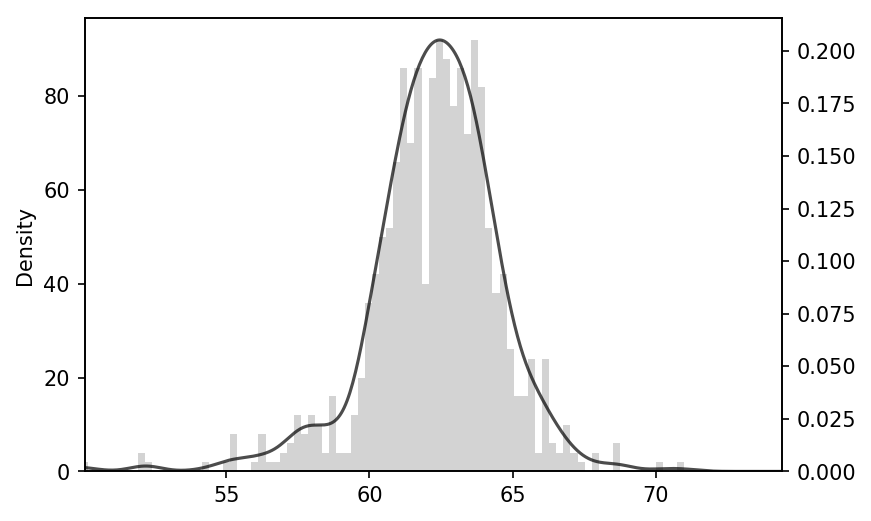

In [30]:
fig = plt.figure(dpi=150)
b_std = find_mrbles.bead_dims.diameter_conv.std()
b_mean = find_mrbles.bead_dims.diameter_conv.mean()
x_left = b_mean - (5*b_std)
x_right = b_mean + (5*b_std)
ax = find_mrbles.bead_dims.diameter_conv.plot(kind='hist', bins=100, color='lightgray').set_xlim(left=x_left, right=x_right)
find_mrbles.bead_dims.diameter_conv.plot(kind='kde', secondary_y=True, color='black', alpha=0.7).set_ylim(bottom=0)

Plot displaying bright-field image depicting found MRBLEs (crosses).

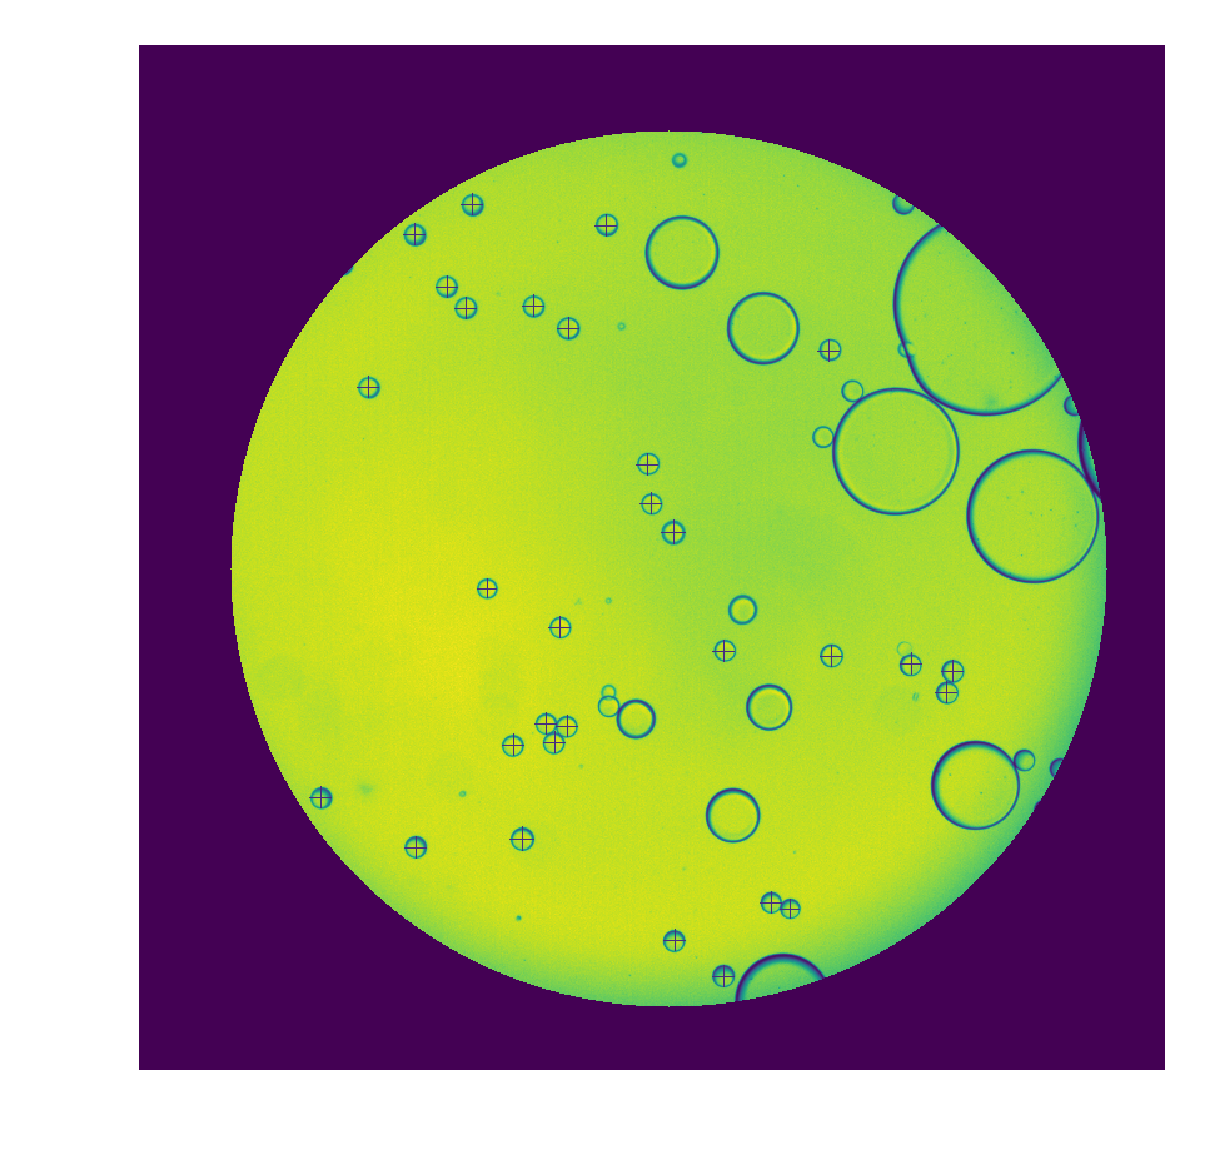

In [31]:
fig = plt.figure(dpi=300)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['Set A', 0, 'mask_check']);

## Create reference spectra using: `mblres.References`

Load all references and add background `bkg` image from the data-set to be invastigated. Choose region where there are no beads

In [32]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": package_path,
    "Sm": package_path,
    "Tm": package_path,
    "Eu": package_path,
    "bkg": package_path
}

REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "peptide_biotin_streptavidin_01_MMStack_Pos0.ome.tif"  # Always change this!
}

In [33]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(388, 542), slice(440, 620)]

Found 1 files in Dy
Found 1 files in Sm
Found 1 files in Tm
Found 1 files in Eu
Found 1 files in bkg


Load files and generate reference spectra.

In [34]:
spec_object.load()

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\skimage\measure\_moments.py:258: UserWarning:

Using deprecated 2D-only, xy-coordinate interface to moments_central. This interface will be removed in scikit-image 0.16. Use moments_central(image, center=(cr, cc), order=3).

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\skimage\measure\_moments.py:258: UserWarning:

Using deprecated 2D-only, xy-coordinate interface to moments_central. This interface will be removed in scikit-image 0.16. Use moments_central(image, center=(cr, cc), order=3).

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\skimage\measure\_moments.py:258: UserWarning:

Using deprecated 2D-only, xy-coordinate interface to moments_central. This interface will be removed in scikit-image 0.16. Use moments_central(image, center=(cr, cc), order=3).

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\skimage\measure\_moments.py:258: UserWarning:

Us

Bead diameter AVG: 15.65
Bead diameter SD: 1.68
Bead diameter CV: 10.72%
Number of beads in set Dy: 269
Number of beads in set Eu: 201
Number of beads in set Sm: 503
Number of beads in set Tm: 308
Total number of beads: 1281


Display and plot data.

In [35]:
spec_object.data

Dy        Sm        Tm        Eu       bkg
channels                                                  
l-435     0.008391  0.016081  0.031182  0.007773  0.161871
l-474     0.399989  0.028204  0.635101  0.013285  0.216341
l-536     0.009668  0.027016  0.041902  0.024369  0.157760
l-546     0.003490  0.007323  0.013256  0.008682  0.078623
l-572     0.531284  0.109748  0.020980  0.008601  0.078623
l-620     0.000839  0.021821  0.002190  0.555845  0.060637
l-630     0.025287  0.298911  0.016081  0.336261  0.064234
l-650     0.006083  0.464374  0.026801  0.038401  0.055498
l-780     0.014970  0.026522  0.212507  0.006784  0.126413

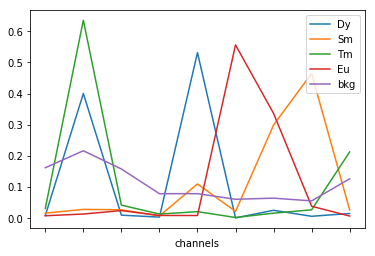

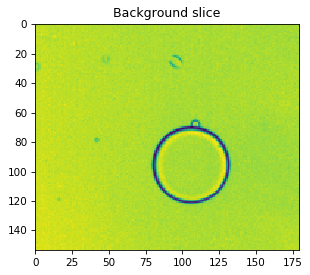

In [36]:
spec_object.plot()

## Generate spectral unmixed images and ratio images using: `mrbles.Ratio`

In [37]:
ratio_images = mrbles.Ratio(spec_object)

In [38]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu',  combine_data=mrbles_images[:, :, ['Cy5_FF']])

See channels generated in `ratio_images` object:

In [39]:
ratio_images['Set A'].c.values.tolist()

['Cy5_FF', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm', 'Tm_ratio', 'bkg']

Check inmixed images. Checking `Tm` and `bkg` since they share similar peak at 780 nm. If unmixing is not working properly it should show in the images.

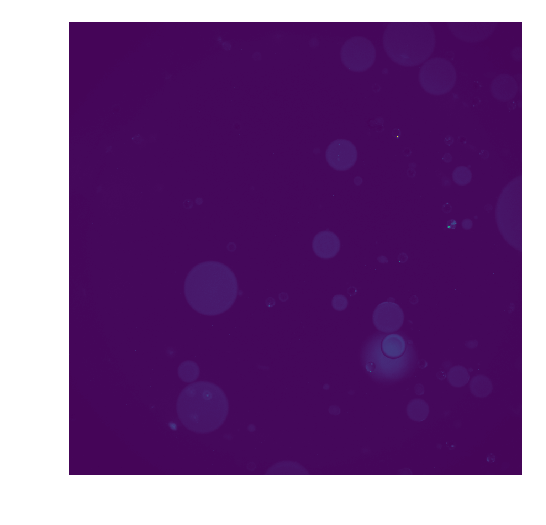

In [40]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Set A', 1, 'bkg']);

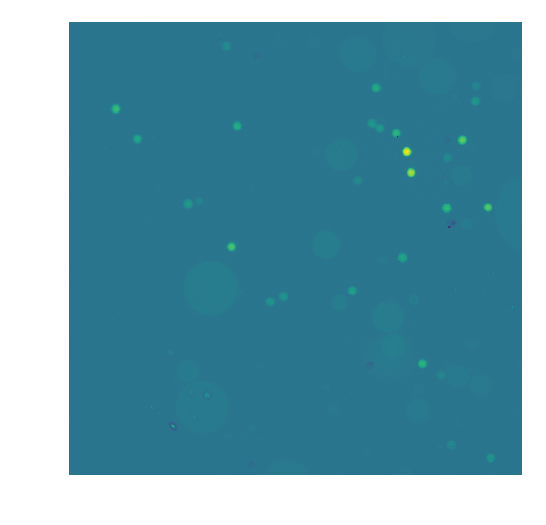

In [41]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Set A', 1, 'Tm']);

## Extract data from each MRBLE using: `mrbles.Extract`

This is the step to use the masks from bead finding and select all channels you want the intensities to be extracted using and select which masks.

In [42]:
extract_data = mrbles.Extract()

Select ratio images (for decoding), `Eu` and `bkg` (for filtering), and assay channels (e.g. Cy5). combine_data with bead dimensions.

In [43]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5_FF']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
                 combine_data=find_mrbles.bead_dims)

In [44]:
extract_data.filter()

Pre-filter: 1638
Post-filter: 1564
Filtered: 74 (4.5%)


In [45]:
extract_data.data

index    set  f  bead_no  label  x_centroid  y_centroid    radius  \
0         0  Set A  0        0    4.0  266.396825  128.285714  8.956232   
1         1  Set A  0        1    5.0  373.290076  144.591603  9.132206   
2         2  Set A  0        2    7.0  220.236220  152.188976  8.991702   
3         3  Set A  0        3   11.0  245.533333  193.509804  9.009385   
4         4  Set A  0        4   13.0  315.304000  209.056000  8.920621   
6         6  Set A  0        6   15.0  342.861314  226.748175  9.338999   
7         7  Set A  0        7   17.0  550.968000  245.016000  8.920621   
9         9  Set A  0        9   27.0  406.230769  335.719231  9.097284   
10       10  Set A  0       10   28.0  409.244813  367.336100  8.758578   
12       12  Set A  0       12   30.0  277.743363  434.920354  8.481629   
13       13  Set A  0       13   33.0  336.004082  466.416327  8.830964   
14       14  Set A  0       14   34.0  467.410359  484.816733  8.938444   
15       15  Set A  0       15   35.0  552.525000  489.082143  9.440697   
16       16  Set A  0       16   36.0  616.929134  495.330709  8.991702   
17       17  Set A  0       17   37.0  649.781132  500.943396  9.184341   
18       18  Set A  0       18   38.0  645.183206  518.450382  9.132206   
19       19  Set A  0       19   43.0  324.995851  543.004149  8.758578   
20       20  Set A  0       20   44.0  342.247934  544.760331  8.776730   
21       21  Set A  0       21   46.0  331.654321  558.144033  8.794845   
22       22  Set A  0       22   47.0  298.533865  560.422311  8.938444   
23       23  Set A  0       23   51.0  145.434426  602.200820  8.812923   
24       24  Set A  0       24   54.0  306.000000  635.020619  9.624353   
25       25  Set A  0       25   55.0  220.505882  641.635294  9.009385   
26       26  Set A  0       26   56.0  504.911017  685.872881  8.667245   
27       27  Set A  0       27   57.0  519.714286  691.261905  8.175884   
28       28  Set A  0       28   58.0  427.545817  716.374502  8.938444   
29       29  Set A  0       29   60.0  466.532819  744.694981  9.079772   
30       30  Set A  1        0    4.0  556.701613  118.463710  8.884866   
32       32  Set A  1        2    6.0  549.233333  182.766667  8.175884   
33       33  Set A  1        3    7.0  304.040323  188.774194  8.884866   
...     ...    ... ..      ...    ...         ...         ...       ...   
1607   1607  Set B  9       70   75.0  561.332061  582.358779  9.132206   
1608   1608  Set B  9       71   76.0  150.516854  587.767790  9.218934   
1609   1609  Set B  9       72   78.0  382.065306  588.934694  8.830964   
1610   1610  Set B  9       73   79.0  202.491667  605.245833  8.740387   
1611   1611  Set B  9       74   80.0  228.805085  606.194915  8.667245   
1612   1612  Set B  9       75   81.0  492.464684  607.579926  9.253397   
1613   1613  Set B  9       76   82.0  262.533613  609.886555  8.703893   
1614   1614  Set B  9       77   83.0  284.967611  614.809717  8.866935   
1615   1615  Set B  9       78   84.0  213.636735  620.330612  8.830964   
1616   1616  Set B  9       79   85.0  526.500000  621.756098  8.848968   
1617   1617  Set B  9       80   86.0  612.414938  623.128631  8.758578   
1618   1618  Set B  9       81   87.0  164.894928  625.402174  9.373021   
1619   1619  Set B  9       82   88.0  265.474178  630.633803  8.234076   
1620   1620  Set B  9       83   89.0  377.967871  637.738956  8.902761   
1621   1621  Set B  9       84   90.0  301.048000  645.448000  8.920621   
1622   1622  Set B  9       85   91.0  555.771654  644.255906  8.991702   
1623   1623  Set B  9       86   92.0  638.579336  644.970480  9.287733   
1624   1624  Set B  9       87   93.0  356.920168  646.029412  8.703893   
1625   1625  Set B  9       88   94.0  474.737255  649.737255  9.009385   
1626   1626  Set B  9       89   95.0  372.779592  652.624490  8.830964   
1627   1627  Set B  9       90   96.0  443.913934  657.795082  8.812923   
1628   1628  Set B  9       91 

## Decode MRBLEs using: `mrbles.Decode`

Set up the decode part of the pipeline. Give it the targets as first parameter (only the targets!), and optionally the additional MRBLEs library information.

In [46]:
mrbles_decode = mrbles.Decode(mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']], seq_list=mrbles_library_info)

In [47]:
mrbles_decode.decode(extract_data.data.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], 
                     combine_data=extract_data.data)

Delta:  0.10396049640682288
Delta:  0.04366521838290875
Delta:  0.044946174695363786
Delta:  0.0012315236530668328
Delta:  0.0007579049010030582
Delta:  0.0
Converged after: 6
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.8169259441888078


Print codes and plot ratio data.

In [48]:
mrbles_decode.plot_clusters_3D()

Filtered by confidence.

In [49]:
mrbles_decode.plot_clusters_3D(confidence=0.95)

In [76]:
mrbles_decode.plot_clusters_2D(['Dy', 'Sm'], ci_trace=0.95)

In [77]:
mrbles_decode.plot_clusters_2D(['Sm', 'Tm'], ci_trace=0.95)

In [78]:
mrbles_decode.plot_clusters_2D(['Tm', 'Dy'], ci_trace=0.95)

(-0.1, 1.1)

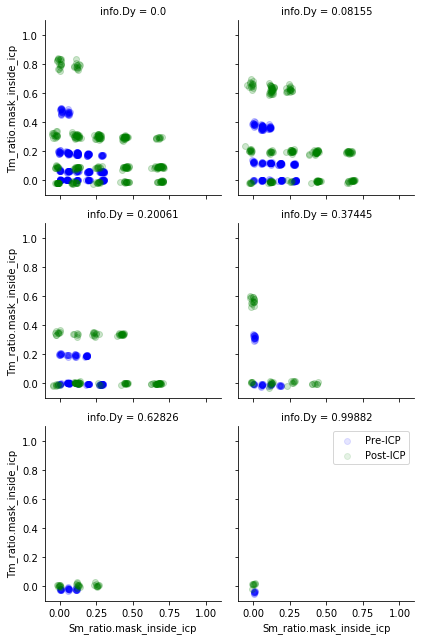

In [53]:
g = sns.FacetGrid(mrbles_decode.data[mrbles_decode.data.confidence > 0.95], col="info.Dy", col_wrap=2, sharey=True, sharex=True);
g.map(sns.regplot, 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color':'black'});
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'black'});
plt.legend(['Pre-ICP', 'Post-ICP'])
g.axes[0].set_ylim(-0.1,1.1)
g.axes[0].set_xlim(-0.1,1.1)
# g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False, 
#       data = mrbles_data[mrbles_data.confidence <= 0.95],
#       scatter=True, scatter_kws={'alpha':0.1, 'color':'red'}, line_kws={'color':'black'});
#g.savefig(r'D:\Per-Dy-Level-SmTm_C.pdf', dpi=300)

(-0.1, 1.1)

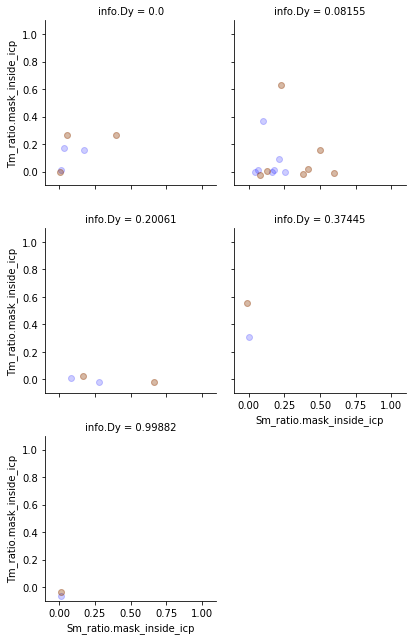

In [54]:
g = sns.FacetGrid(mrbles_decode.data[mrbles_decode.data.confidence < 0.95], col="info.Dy", col_wrap=2, sharey=True, sharex=True);
g.map(sns.regplot, 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color':'black'});
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'black'});
plt.legend(['Pre-ICP', 'Post-ICP', 'CI_filter'])
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False, 
      data = mrbles_decode.data[mrbles_decode.data.confidence <= 0.95],
      scatter=True, scatter_kws={'alpha':0.1, 'color':'red'}, line_kws={'color':'black'});
g.axes[0].set_ylim(-0.1,1.1)
g.axes[0].set_xlim(-0.1,1.1)
#g.savefig('CI95-low_B.pdf', dpi=300)

In [127]:
from importlib import reload
reload(mrbles.pipeline)
reload(mrbles.report)
reload(mrbles)

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.11.5


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

In [98]:
analyze = mrbles.Analyze(mrbles_decode, mrbles_library_info, ratio_images, find_mrbles)

In [73]:
analyze.analyze('Cy5_FF.mask_ring', confidence=0.95, bkg_data='Cy5_FF.mask_bkg')

In [74]:
analyze.data_per_code

set  code          mean        median           sd          se     N  \
0   Set A     0  13022.573967  13520.011453  1715.494388  404.345905  19.0   
1   Set A     1  11322.278081  11002.100014  1517.980282  457.688276  12.0   
2   Set A     2  12293.343274  12041.676685  1320.263705  340.890623  16.0   
3   Set A     3  11145.285203  11135.708761  1698.731967  412.003019  18.0   
4   Set A     4  10146.413336   9981.521488  1047.360340  270.427277  16.0   
5   Set A     5  11640.119519  11763.279213  1488.809209  350.915696  19.0   
6   Set A     6  10340.790597  10118.501072  1672.145579  321.804567  28.0   
7   Set A     7   8594.032030   8430.305999   956.498042  265.284826  14.0   
8   Set A     8  12880.380228  12739.689633  1709.851746  515.539699  12.0   
9   Set A     9  11895.867868  11952.253871  1295.011891  431.670630  10.0   
10  Set A    10  11458.572168  11434.410915  1182.453401  215.885467  31.0   
11  Set A    11  14244.062825  14423.225727  1614.457363  431.481880  15.0   
12  Set A    12  10727.530692  10395.946383   982.224395  214.338935  22.0   
13  Set A    13  11127.318057  11007.063949   988.968052  193.952592  27.0   
14  Set A    14  12168.012111  12331.972106  1071.269034  245.765972  20.0   
15  Set A    15  11819.379224  11747.793503   997.394718  173.624135  34.0   
16  Set A    16   9862.588406   9929.785536   836.013836  278.671279  10.0   
17  Set A    17  10795.416949  10351.340394  1170.111609  477.696064   7.0   
18  Set A    18  12883.651281  12820.110792   869.288601  250.942004  13.0   
19  Set A    19  12084.681437  12265.320324  1122.607579  300.029496  15.0   
20  Set A    20  11815.150750  11941.968767   956.831797  232.065798  18.0   
21  Set A    21  11451.696724  10855.078379  1922.949918  608.090157  11.0   
22  Set A    22  13430.753708  13177.510100  1650.724399  296.478854  32.0   
23  Set A    23  11321.475584  11359.449427  1450.963030  725.481515   5.0   
24  Set A    24  13764.504110  13831.594594  2172.404039  485.764311  21.0   
25  Set A    25  13528.392346  13455.344607  1815.936670  440.429335  18.0   
26  Set A    26  11711.105753  11665.845644   959.356285  220.091426  20.0   
27  Set A    27  11689.390650  11585.442319  1486.732862  291.572303  27.0   
28  Set A    28  11477.253873  11522.514174   616.259186  141.379553  20.0   
29  Set A    29  13065.320423  12841.075561  1257.073311  288.392396  20.0   
..    ...   ...           ...           ...          ...         ...   ...   
66  Set B    18  12883.651281  12820.110792   869.288601  250.942004  13.0   
67  Set B    19  12084.681437  12265.320324  1122.607579  300.029496  15.0   
68  Set B    20  11815.150750  11941.968767   956.831797  232.065798  18.0   
69  Set B    21  11451.696724  10855.078379  1922.949918  608.090157  11.0   
70  Set B    22  13430.753708  13177.510100  1650.724399  296.478854  32.0   
71  Set B    23  11321.475584  11359.449427  1450.963030  725.481515   5.0   
72  Set B    24  13764.504110  13831.594594  2172.404039  485.764311  21.0   
73  Set B    25  13528.392346  13455.344607  1815.936670  440.429335  18.0   
74  Set B    26  11711.105753  11665.845644   959.356285  220.091426  20.0   
75  Set B    27  11689.390650  11585.442319  1486.732862  291.572303  27.0   
76  Set B    28  11477.253873  11522.514174   616.259186  141.379553  20.0   
77  Set B    29  13065.320423  12841.075561  1257.073311  288.392396  20.0   
78  Set B    30  11146.985655  10902.351122   858.064732  303.371695   9.0   
79  Set B    31  11491.468181  11346.033651   861.551025  287.183675  10.0   
80  Set B    32  17636.899949  17400.113118  2172.227833  396.592728  31.0   
81  Set B    33  10938.715787  11077.743353  1519.765931  679.659986   6.0   
82  Set B    34  13744.410968  14339.722275  1407.444749  995.213726   3.0   
83  Set B    35  10021.153761   9945.458405   523.699333  165.608270  11.0   
84  Set B    36   8937.380900   9012.566750   618.597447  171.568063  14.0   
85  Set B    37  11418.68389

In [75]:
analyze.data_per_bead

index    set  f  bead_no  label  x_centroid  y_centroid    radius  \
0         0  Set A  0        0    4.0  266.396825  128.285714  8.956232   
1         1  Set A  0        1    5.0  373.290076  144.591603  9.132206   
2         2  Set A  0        2    7.0  220.236220  152.188976  8.991702   
3         3  Set A  0        3   11.0  245.533333  193.509804  9.009385   
4         4  Set A  0        4   13.0  315.304000  209.056000  8.920621   
6         6  Set A  0        6   15.0  342.861314  226.748175  9.338999   
7         7  Set A  0        7   17.0  550.968000  245.016000  8.920621   
9         9  Set A  0        9   27.0  406.230769  335.719231  9.097284   
10       10  Set A  0       10   28.0  409.244813  367.336100  8.758578   
12       12  Set A  0       12   30.0  277.743363  434.920354  8.481629   
13       13  Set A  0       13   33.0  336.004082  466.416327  8.830964   
14       14  Set A  0       14   34.0  467.410359  484.816733  8.938444   
15       15  Set A  0       15   35.0  552.525000  489.082143  9.440697   
16       16  Set A  0       16   36.0  616.929134  495.330709  8.991702   
17       17  Set A  0       17   37.0  649.781132  500.943396  9.184341   
18       18  Set A  0       18   38.0  645.183206  518.450382  9.132206   
19       19  Set A  0       19   43.0  324.995851  543.004149  8.758578   
20       20  Set A  0       20   44.0  342.247934  544.760331  8.776730   
21       21  Set A  0       21   46.0  331.654321  558.144033  8.794845   
22       22  Set A  0       22   47.0  298.533865  560.422311  8.938444   
23       23  Set A  0       23   51.0  145.434426  602.200820  8.812923   
24       24  Set A  0       24   54.0  306.000000  635.020619  9.624353   
25       25  Set A  0       25   55.0  220.505882  641.635294  9.009385   
26       26  Set A  0       26   56.0  504.911017  685.872881  8.667245   
27       27  Set A  0       27   57.0  519.714286  691.261905  8.175884   
28       28  Set A  0       28   58.0  427.545817  716.374502  8.938444   
29       29  Set A  0       29   60.0  466.532819  744.694981  9.079772   
30       30  Set A  1        0    4.0  556.701613  118.463710  8.884866   
32       32  Set A  1        2    6.0  549.233333  182.766667  8.175884   
33       33  Set A  1        3    7.0  304.040323  188.774194  8.884866   
...     ...    ... ..      ...    ...         ...         ...       ...   
1607   1607  Set B  9       70   75.0  561.332061  582.358779  9.132206   
1608   1608  Set B  9       71   76.0  150.516854  587.767790  9.218934   
1609   1609  Set B  9       72   78.0  382.065306  588.934694  8.830964   
1610   1610  Set B  9       73   79.0  202.491667  605.245833  8.740387   
1611   1611  Set B  9       74   80.0  228.805085  606.194915  8.667245   
1612   1612  Set B  9       75   81.0  492.464684  607.579926  9.253397   
1613   1613  Set B  9       76   82.0  262.533613  609.886555  8.703893   
1614   1614  Set B  9       77   83.0  284.967611  614.809717  8.866935   
1615   1615  Set B  9       78   84.0  213.636735  620.330612  8.830964   
1616   1616  Set B  9       79   85.0  526.500000  621.756098  8.848968   
1617   1617  Set B  9       80   86.0  612.414938  623.128631  8.758578   
1618   1618  Set B  9       81   87.0  164.894928  625.402174  9.373021   
1619   1619  Set B  9       82   88.0  265.474178  630.633803  8.234076   
1620   1620  Set B  9       83   89.0  377.967871  637.738956  8.902761   
1621   1621  Set B  9       84   90.0  301.048000  645.448000  8.920621   
1622   1622  Set B  9       85   91.0  555.771654  644.255906  8.991702   
1623   1623  Set B  9       86   92.0  638.579336  644.970480  9.287733   
1624   1624  Set B  9       87   93.0  356.920168  646.029412  8.703893   
1625   1625  Set B  9       88   94.0  474.737255  649.737255  9.009385   
1626   1626  Set B  9       89   95.0  372.779592  652.624490  8.830964   
1627   1627  Set B  9       90   96.0  443.913934  657.795082  8.812923   
1628   1628  Set B  9       91 

In [59]:
# analyze.normalize(mrbles_decode.data.loc[(mrbles_decode.data.confidence>=0.95), ('code', 'Cy5_FF.mask_ring')])

In [72]:
analyze.mrble_report('Cy5_FF', 'test.pdf', set_name='Set A', codes=[0,2,3])

Total beads: 55
Total images: 550
Total estimated time required: 0 minutes
Do you wan to continue (y for yes, or n for no)?: y
Total time: 0 minutes 13 seconds
Time per-image: 0.02388


In [128]:
qc_report = mrbles.report.QCReport(mrbles_decode.data)

In [129]:
qc_report.generate('test-qc.pdf', savefig=True)

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

